# Calculating Canopy Cover

Simple example demonstrating how to estimate canopy cover based on the number of green pixels in stereo RGB image.

Install mdld3 package for interactive plot

In [1]:
!pip install -q mpld3

In [2]:
import rasterio
import numpy as np
from osgeo import gdal, osr
from PIL import Image, ImageFilter
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:

import mpld3
mpld3.enable_notebook()

This is a single timestep for the stereo RGB camera. There can be up to 7000 images taken for the complete field scan.

In [4]:
path = "/shared/terraref/sites/ua-mac/Level_1/rgb_geotiff/2017-06-20/2017-06-20__11-13-59-637/rgb_geotiff_L1_ua-mac_2017-06-20__11-13-59-637_left.tif"

In [5]:
ds = gdal.Open(path)
ds.GetProjectionRef()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

Display the image. The RGB scanner has millimeter resolution.

<IPython.core.display.Javascript object>


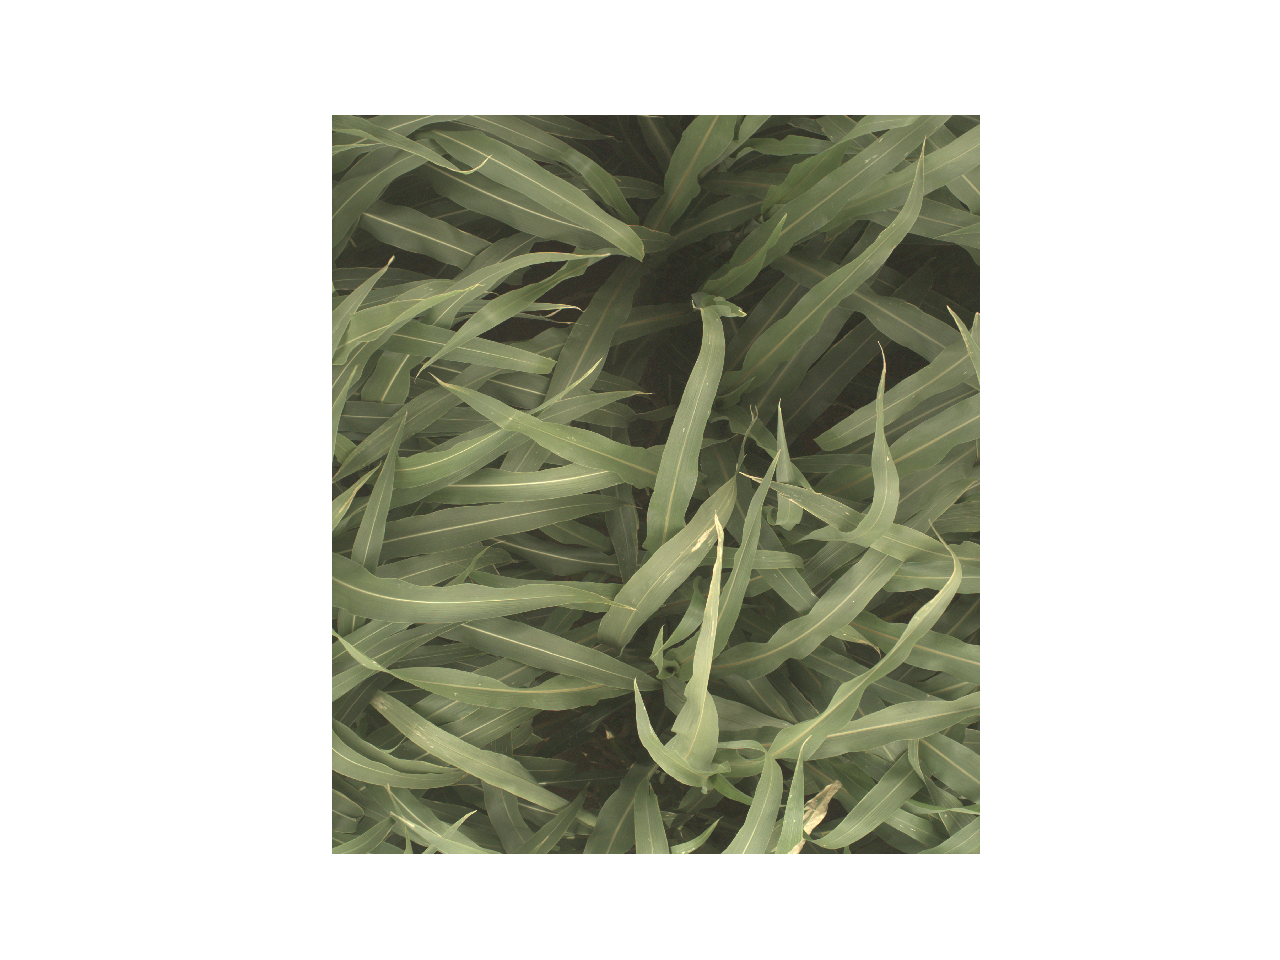

In [6]:
arr = ds.ReadAsArray()
trans = ds.GetGeoTransform()
extent = (trans[0], trans[0] + ds.RasterXSize*trans[1],
          trans[3] + ds.RasterYSize*trans[5], trans[3])

plt.imshow(arr[:3,:,:].transpose((1, 2, 0)), extent=extent)
plt.axis('off')

plt.show()

Estimate canopy cover for this image based on the ratio of green pixels

In [7]:
kernel=5
img = np.rollaxis(arr,0,3)

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
    
sub_img = (g.astype('int') - r.astype('int') - 2) > 0
    
mask = np.zeros_like(b)
mask[sub_img] = 255
    
im = Image.fromarray(mask)
blur = im.filter(ImageFilter.BLUR)
pix = np.array(blur)
sub_mask = pix > 128
    
c = np.count_nonzero(sub_mask)
ratio = c/float(b.size)
print(ratio)

0.7503177579178056
